In [1]:
using DataFrames
using Seaborn
using CSV

In [48]:
include("src/gen_toy_data.jl")

gen_simple_traj

### generate simple trajectories

In [49]:
n_scenes = 350
scenes = [gen_simple_traj(road_length=rand(1000:1500), n_cars=rand(3:6)) 
        for _ in 1:n_scenes]

n_obs = sum(prod(size(s, 1, 2)) for s in scenes)

1303513

In [50]:
n_trajs = sum(size(s, 1) for s in scenes)

1581

### plot

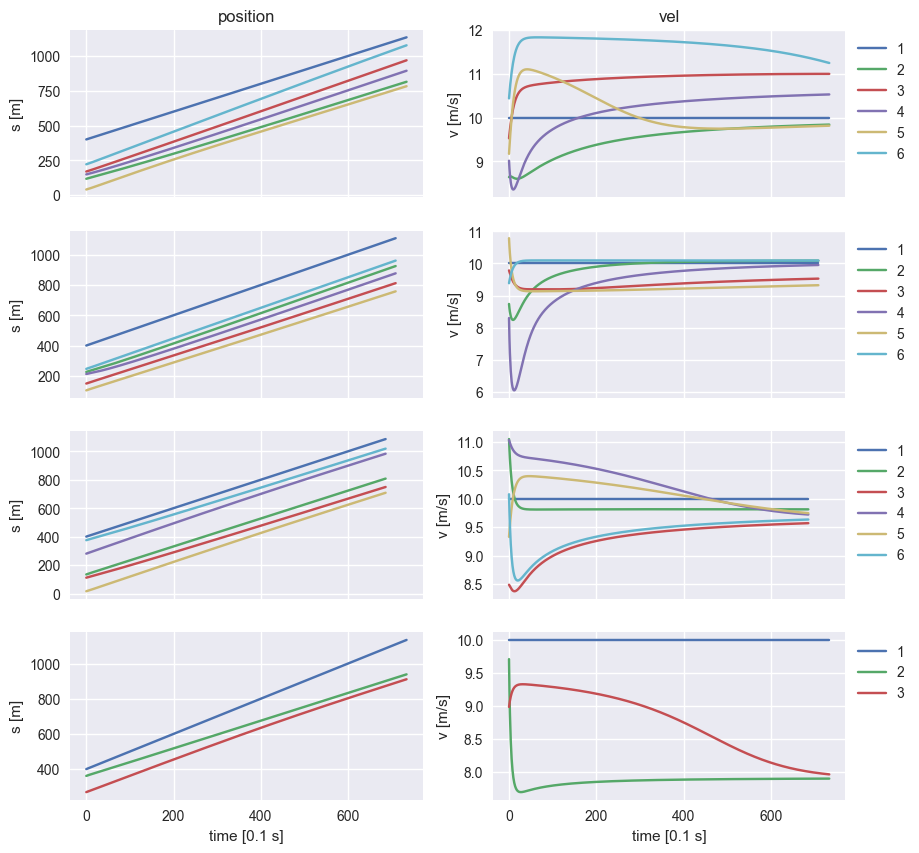

PyObject <matplotlib.text.Text object at 0x0000000001FC5DA0>

In [51]:
n_plot = 4
(fig, axs) = subplots(n_plot, 2, figsize=(10, 10), sharex=true)


for i in 1:n_plot
    S = rand(scenes)
    for d in 1:2
        for c in 1:size(S, 1)
            axs[i, d][:plot](S[c, :, d], label=c)
        end
    end
    axs[i, 1][:set_ylabel]("s [m]")
    axs[i, 2][:set_ylabel]("v [m/s]")
    axs[i, 2][:legend](bbox_to_anchor=(1,1))
end
axs[1, 1][:set_title]("position")
axs[1, 2][:set_title]("vel")
axs[1, 2][:legend](bbox_to_anchor=(1,1))
axs[end, 1][:set_xlabel]("time [0.1 s]")
axs[end, 2][:set_xlabel]("time [0.1 s]")

### combine the data

In [52]:
#
# the scene each datum belongs to; i.e. id which cars are together
#
loc = 0
scene_number = Vector{Int}(n_obs)

for (i, s) in scenes |> enumerate
    l = prod(size(s, 1, 2))
    r = loc + (1:l)
    scene_number[r] = i
    loc += l
end

In [53]:
#
# the traj each traj belongs to; i.e. what car the data is from
#
loc = 0
id = 1
traj_number = Vector{Int}(n_obs)

for S in scenes
    l = size(S, 2)
    for _ in 1:size(S, 1)
        r = loc + (1:l)
        traj_number[r] = id
        loc += l
        id += 1
    end
end
#traj_number[(800*90)+(1:800)]

In [54]:
#
# all together now
#
loc = 0
X = Matrix{Float64}(size(first(scenes), 3), n_obs)

for S in scenes
    l = size(S, 2)
    for c in 1:size(S, 1)
        r = loc + (1:l)
        X[:, r] = S[c, :, :]'
        loc += l
    end
end

In [55]:
df = DataFrame([Float64, Float64, Int, Int], [:s, :v, :traj, :scene], n_obs)
df[:s] = X[1, :]
df[:v] = X[2, :]
df[:traj] = traj_number
df[:scene] = scene_number
;

In [56]:
DATA_PATH = "../data/toy_data"
!isdir(DATA_PATH) && Base.Filesystem.mkdir(DATA_PATH)

false

In [57]:
CSV.write(joinpath(DATA_PATH, "X.csv"), df, header=true)

CSV.Sink(    CSV.Options:
        delim: ','
        quotechar: '"'
        escapechar: '\\'
        null: ""
        dateformat: dateformat"yyyy-mm-dd", IOBuffer(data=UInt8[...], readable=true, writable=true, seekable=true, append=false, size=0, maxsize=Inf, ptr=1, mark=-1), "../data/toy_data/X.csv", 23, true, String["s", "v", "traj", "scene"], false)